In [7]:
%pip install tensorflow numpy pandas scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np

x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [0], [0], [1]])

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

# # Cek apakah DirectML tersedia
# physical_devices = tf.config.list_physical_devices()
# print("Available devices:", physical_devices)

# Contoh dataset sederhana (AND Gate)
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [0], [0], [1]], dtype=np.float32)

# Definisi model
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Callback untuk menyimpan model terbaik
checkpoint = ModelCheckpoint('best_model.h5', monitor='accuracy', save_best_only=True, mode='max')

# Gunakan sesi TensorFlow untuk mengontrol perangkat
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # Untuk mengontrol penggunaan GPU secara dinamis
session = tf.Session(config=config)

# Menjalankan model menggunakan sesi TensorFlow
with session.as_default():
    # **Memaksa penggunaan DirectML jika tersedia**
    try:
        with tf.device('/device:DML:0'):
            print("Training menggunakan DirectML (GPU)")
            model.fit(x, y, epochs=1000, verbose=1, callbacks=[checkpoint])
    except RuntimeError as e:
        print("Gagal menggunakan DirectML, menggunakan CPU sebagai fallback.")
        print("Error:", e)
        model.fit(x, y, epochs=1000, verbose=1, callbacks=[checkpoint])


Training menggunakan DirectML (GPU)
Train on 4 samples
Epoch 1/1000
4/4 [==============================] - 0s 29ms/sample - loss: 0.6837 - acc: 0.7500
Epoch 2/1000
4/4 [==============================] - 0s 9ms/sample - loss: 0.6830 - acc: 0.7500
Epoch 3/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.6822 - acc: 0.7500
Epoch 4/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.6814 - acc: 0.7500
Epoch 5/1000
4/4 [==============================] - 0s 874us/sample - loss: 0.6806 - acc: 0.7500
Epoch 6/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.6798 - acc: 0.7500
Epoch 7/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.6790 - acc: 0.7500
Epoch 8/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.6782 - acc: 0.7500
Epoch 9/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.6774 - acc: 0.7500
Epoch 10/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.6766 - acc

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Define model checkpoint callback
checkpoint = ModelCheckpoint('best_model.h5', monitor='accuracy', save_best_only=True, mode='max')

# Fit the model using CPU
with tf.device('/cpu:0'):
    model.fit(x, y, epochs=1000, verbose=1, callbacks=[checkpoint])

Train on 4 samples
Epoch 1/1000
4/4 [==============================] - 0s 43ms/sample - loss: 0.7058 - acc: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7046 - acc: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.7032 - acc: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7018 - acc: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7004 - acc: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.6990 - acc: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.6976 - acc: 0.5000
Epoch 8/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.6962 - acc: 0.5000
Epoch 9/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.6949 - acc: 0.5000
Epoch 10/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.6935 - acc: 0.5000
Epoch 11/1000
4/4 [==========

In [37]:
z = np.array([[1,0]])
predictions = model.predict(x)
print("Prediksi:")
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Prediksi:
[[2.0118849e-03]
 [8.2754379e-04]
 [1.1830297e-04]
 [9.9969161e-01]]


In [38]:
binary_predictions = (predictions > 0.5).astype(int)
print("Prediksi:")
print(binary_predictions)

Prediksi:
[[0]
 [0]
 [0]
 [1]]


In [2]:
import tensorflow as tf

print("Devices available:", tf.config.experimental.list_physical_devices())

# Menetapkan TensorFlow agar menggunakan DirectML jika tersedia
try:
    tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)
    print("Using GPU:", tf.config.experimental.list_physical_devices('GPU')[0])
except:
    print("No GPU found. Running on CPU.")


Devices available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:DML:0', device_type='DML')]
No GPU found. Running on CPU.


In [1]:
pip install tensorflow-directml


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-directml (from versions: none)
ERROR: No matching distribution found for tensorflow-directml
You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [15]:
import tensorflow as tf

with tf.device('/device:DML:0'):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
    c = tf.matmul(a, b)
    print(c)


Tensor("MatMul_4:0", shape=(2, 2), dtype=float32, device=/device:DML:0)


In [2]:
import tensorflow as tf
print(tf.test.is_gpu_available())


True


In [4]:
print(tf.config.list_physical_devices('DML'))


AttributeError: module 'tensorflow._api.v1.config' has no attribute 'list_physical_devices'

In [ ]:
import tensorflow as tf

# Cek apakah TensorFlow benar-benar menggunakan DirectML
with tf.device('/device:DML:0'):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[5.0, 6.0], [7.0, 8.0]])
    c = tf.matmul(a, b)  # Operasi matrix multiplication

    with tf.Session() as sess:
        result = sess.run(c)
        print("Hasil operasi di DirectML:", result)


Hasil operasi di DirectML: [[19. 22.]
 [43. 50.]]


In [ ]:
import tensorflow as tf
import time

# Pastikan TensorFlow menggunakan DirectML
with tf.device('/device:DML:0'):
    print("Menggunakan GPU DirectML untuk komputasi...")

    # Membuat dua matriks besar (ukuran 4000x4000)
    a = tf.random.uniform([4000, 4000], dtype=tf.float32)
    b = tf.random.uniform([4000, 4000], dtype=tf.float32)

    # Operasi matrix multiplication
    c = tf.matmul(a, b)

    # Eksekusi di dalam session
    with tf.Session() as sess:
        start_time = time.time()
        result = sess.run(c)
        end_time = time.time()

        print("Waktu eksekusi:", end_time - start_time, "detik")


Menggunakan GPU DirectML untuk komputasi...
Waktu eksekusi: 1.5209901332855225 detik


In [1]:
import tensorflow as tf
import time

n = 50000  # Ubah ke angka besar untuk stress test

def fibonacci(n):
    a = tf.Variable(0, dtype=tf.int64)
    b = tf.Variable(1, dtype=tf.int64)

    for _ in range(n):
        temp = a + b
        a = b
        b = temp
    return b

# Jalankan di DirectML
with tf.device('/device:DML:0'):
    print("Menghitung Fibonacci di GPU...")
    start_time = time.time()

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        result = sess.run(fibonacci(n))

    end_time = time.time()

print(f"Hasil Fibonacci ke-{n}:", result)
print("Waktu eksekusi:", end_time - start_time, "detik")


Menghitung Fibonacci di GPU...


FailedPreconditionError: 2 root error(s) found.
  (0) Failed precondition: Attempting to use uninitialized value Variable
	 [[node Variable/read (defined at c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\framework\ops.py:1762) ]]
	 [[add_49999/_1]]
  (1) Failed precondition: Attempting to use uninitialized value Variable
	 [[node Variable/read (defined at c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\framework\ops.py:1762) ]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'Variable/read':
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelapp.py", line 619, in start
    self.io_loop.start()
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\asyncio\base_events.py", line 442, in run_forever
    self._run_once()
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\asyncio\base_events.py", line 1462, in _run_once
    handle._run()
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\ioloop.py", line 688, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\ioloop.py", line 741, in _run_callback
    ret = callback()
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 814, in inner
    self.ctx_run(self.run)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\tornado\gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\ipykernel\ipkernel.py", line 302, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\ipykernel\zmqshell.py", line 539, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 2867, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 3072, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\anfiniti\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-f562140dd57b>", line 23, in <module>
    result = sess.run(fibonacci(n))
  File "<ipython-input-1-f562140dd57b>", line 7, in fibonacci
    a = tf.Variable(0, dtype=tf.int64)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\ops\variables.py", line 258, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\ops\variables.py", line 219, in _variable_v1_call
    shape=shape)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\ops\variables.py", line 197, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\ops\variable_scope.py", line 2519, in default_variable_creator
    shape=shape)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\ops\variables.py", line 262, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\ops\variables.py", line 1688, in __init__
    shape=shape)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\ops\variables.py", line 1872, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 203, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 4974, in identity
    "Identity", input=input, name=name)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3371, in create_op
    attrs, op_def, compute_device)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3440, in _create_op_internal
    op_def=op_def)
  File "c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1762, in __init__
    self._traceback = tf_stack.extract_stack()


In [49]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from IPython.display import clear_output

# Load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalisasi data ke range 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Konversi label ke one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model CNN untuk CIFAR-10
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Kompilasi model
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define model checkpoint callback
checkpoint = ModelCheckpoint('model_CNN2.h5', monitor='val_acc', save_best_only=True, mode='max')

# Gunakan DirectML jika tersedia
try:
    with tf.device('/device:DML:0'):
        print("Training dengan DirectML (GPU AMD)")
        history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=[checkpoint], verbose=1)
except Exception as e:
    print("Gagal menggunakan DirectML, fallback ke CPU.")
    print("Error:", e)
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[checkpoint], verbose=2)


Training dengan DirectML (GPU AMD)
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 371us/sample - loss: 1.5732 - acc: 0.4170 - val_loss: 1.3252 - val_acc: 0.5218
Epoch 2/100
50000/50000 [==============================] - 15s 310us/sample - loss: 1.1979 - acc: 0.5699 - val_loss: 1.1184 - val_acc: 0.6043
Epoch 3/100
50000/50000 [==============================] - 16s 317us/sample - loss: 1.0260 - acc: 0.6369 - val_loss: 0.9864 - val_acc: 0.6495
Epoch 4/100
50000/50000 [==============================] - 16s 311us/sample - loss: 0.8995 - acc: 0.6811 - val_loss: 0.9942 - val_acc: 0.6500
Epoch 5/100
50000/50000 [==============================] - 15s 301us/sample - loss: 0.8076 - acc: 0.7153 - val_loss: 0.8979 - val_acc: 0.6873
Epoch 6/100
50000/50000 [==============================] - 15s 302us/sample - loss: 0.7295 - acc: 0.7436 - val_loss: 0.8638 - val_acc: 0.7018
Epoch 7/100
50000/50000 [==============================] - 15s 

In [52]:
# Load model from checkpoint
model.load_weights('model_CNN2.h5')

# Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Akurasi pada dataset uji:", test_acc)

10000/10000 [==============================] - 2s 238us/sample - loss: 0.9288 - acc: 0.7221
Akurasi pada dataset uji: 0.72209996


In [54]:
# Mencari epoch dengan akurasi validasi terbaik
best_epoch = max(enumerate(history.history['val_acc']), key=lambda x: x[1])

# Menampilkan epoch terbaik
print(f"Epoch terbaik: {best_epoch[0] + 1} dengan akurasi validasi: {best_epoch[1]:.4f}")


Epoch terbaik: 12 dengan akurasi validasi: 0.7221


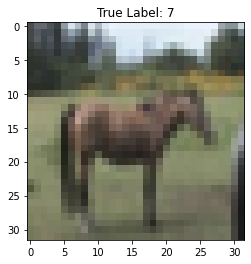

Predicted Label: 7


In [47]:
import numpy as np

import matplotlib.pyplot as plt

# Select a single image from the test set
index = 9999  # Change this index to test different images
test_image = x_test[index]
test_label = y_test[index]

# Display the image
plt.imshow(test_image)
plt.title(f"True Label: {np.argmax(test_label)}")
plt.show()

# Preprocess the image
test_image = np.expand_dims(test_image, axis=0)

# Predict the label of the image
predicted_label = model.predict(test_image)
predicted_class = np.argmax(predicted_label)

print(f"Predicted Label: {predicted_class}")